<a href="https://colab.research.google.com/github/wangyu16/PolymerScienceEducation/blob/master/OVESET/05_Copolymerization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><a href="https://wangyu16.github.io/PolymerScienceEducation/"><img src="https://raw.githubusercontent.com/wangyu16/PolymerScienceEducation/master/Fig/Logo_black.svg" width='150' /></a></center>

# Radical Copolymerization Statistics

---

To learn the background knowledge, please visit this [study guide](https://hackmd.io/@YW2025/SyWv3WRn0)

##  What does this simulator do and how to use it?

This simulator shows you that in a radical copolymerization of two types of monomers, how would the reactivity ratios and the feedstock fraction of monomers affect the composition of the resulting polymers.

Simply select the reactivity ratios (r1 and r2) and the initial feedstock fraction of monomer 1 (f1_0), then run all cells, the results will be plotted directly in this notebook.

In [1]:
#@title 1. Install and import packages {display-mode: "form" }
%%capture
import sys
if not 'sigfig' in sys.modules:
    !pip install sigfig
from sigfig import round

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#@title 2. Simulation conditions. {display-mode: "form" }
#@markdown Please input the reactivity ratios.
r1 = 0.13 #@param {type:"number"}
r2 = 1.16 #@param {type:"number"}
#@markdown Please select the initial feedstock molar fraction of monomer 1.
f1_0 = 0.97 #@param {type:"slider", min:0, max:1, step:0.01}
Nt_0=1000000 # Set the total number of monomers.




In [3]:
#@title 3. Simulation
%%time

# Define a function to determine which monomer to add.
def add_monomer(r1,r2,f1,chainend):
  if chainend == 1:
    chance_1 = r1*f1/(r1*f1-f1+1)
  else:
    chance_1 = f1/(f1+r2-r2*f1)
  #print(chance_1)
  if np.random.random() < chance_1:
    return 1
  else:
    return 2

# Randomize the initial monomer unit simply based on the monomer fraction.
if np.random.random()<f1_0:
  M0 = 1
else:
  M0 = 2

# Create an object to store the polymer chain sequence,
# monomer 1 fraction in the feedstock,
# fraction of monomer 1 incoporating into the polymer at this moment,
# cumulative monomer 1 fraction in the polymer.
chains = [[M0],[f1_0],[0],[0]]

N1_0=Nt_0*f1_0
Nt=Nt_0
N1=N1_0
f1=f1_0

# Construct the polymer chain.
for i in range(Nt):
  monomer = add_monomer(r1,r2,f1,chains[0][-1])
  Nt-=1
  if monomer == 1:
    N1-=1
  if Nt > 0:
    f1 = N1/Nt
  else:
    f1 = 0
  F1= (r1*f1**2+f1*(1-f1))/(r1*f1**2+2*f1*(1-f1)+r2*(1-f1)**2)

  if Nt_0==Nt:
    F_cumu = 0
  else:
    F_cumu = (N1_0-N1)/(Nt_0-Nt)

  chains[0].append(monomer)
  chains[1].append(f1)
  chains[2].append(F1)
  chains[3].append(F_cumu)

# Select the information to be reported

chain_secs = np.empty(shape=(99,100))
info = {'Overall monomer conversion':[],'Feedstock fraction of 1':[],'Cumulative fraction of 1 in polymers':[],'Fraction of 1 incoporating into polymers':[],'Fraction of 1 in sample chain section':[]}
df_info = pd.DataFrame(info)

for i in range(1,100):
  sta=int(abs(i*Nt_0/100))
  chain_secs[i-1]=chains[0][sta-50:sta+50]
  df_info.loc[len(df_info.index)] = [sta/Nt_0*100,chains[1][sta]*100,chains[3][sta]*100,chains[2][sta]*100,chains[0][sta-50:sta+50].count(1)]

CPU times: user 4.16 s, sys: 255 ms, total: 4.42 s
Wall time: 8.16 s


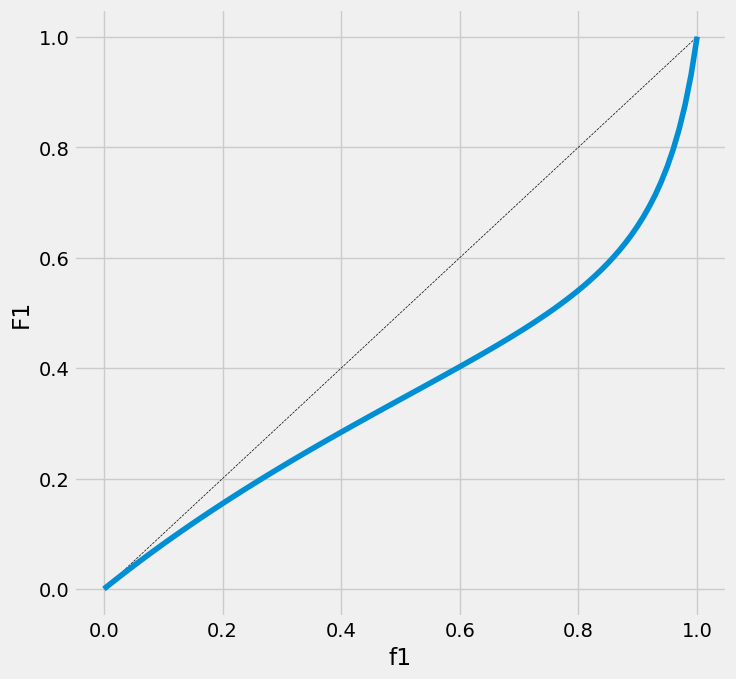

In [4]:
#@title 4. Results {display-mode: "form" }
# Plot F1 vs f1
plt.rcParams["figure.figsize"] = (7.5,7.5)
f1 = np.linspace(0,1, 100)
F1= (r1*f1**2+f1*(1-f1))/(r1*f1**2+2*f1*(1-f1)+r2*(1-f1)**2)
plt.plot(f1,f1,'k--',linewidth=0.5)
plt.plot(f1,F1)
plt.xlabel('f1')
plt.ylabel('F1')
plt.show()

### Want to get some hints?

The feedstock fraction of 1 is 100.0% at this moment.

The value of F1 is 100.0% at this moment.

The cumulative fraction of monomer 1 units in polymers is 96.6% at this moment.

Some sample chain sections produced at this moment are shown below.


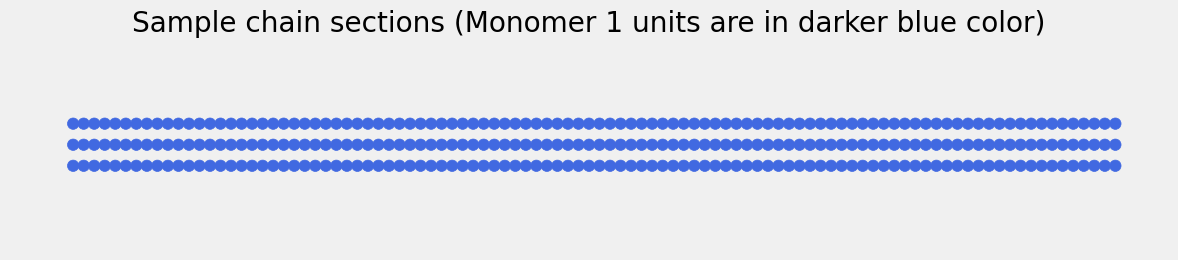

The fractions of 1 units are 100%, 100%, and 100% in these three chain sections.


In [5]:
#@title Show sample chain sections at a given overall monomer conversion. { run: "auto", display-mode: "form" }
Overall_monomer_conversion = 0.88 #@param {type:"slider", min:0.01, max:0.99, step:0.01}

print(f"The feedstock fraction of 1 is {round(df_info['Feedstock fraction of 1'][Overall_monomer_conversion*100-1],3)}% at this moment.\n")
print(f"The value of F1 is {round(df_info['Fraction of 1 incoporating into polymers'][Overall_monomer_conversion*100-1],3)}% at this moment.\n")
print(f"The cumulative fraction of monomer 1 units in polymers is {round(df_info['Cumulative fraction of 1 in polymers'][Overall_monomer_conversion*100-1],3)}% at this moment.\n")
print("Some sample chain sections produced at this moment are shown below.")

chain_sams=np.empty(shape=(3,100))
chain_sams[0]=chains[0][int(abs(Overall_monomer_conversion*Nt_0))-150:int(abs(Overall_monomer_conversion*Nt_0))-50]
chain_sams[1]=chains[0][int(abs(Overall_monomer_conversion*Nt_0))-50:int(abs(Overall_monomer_conversion*Nt_0))+50]
chain_sams[2]=chains[0][int(abs(Overall_monomer_conversion*Nt_0))+50:int(abs(Overall_monomer_conversion*Nt_0))+150]
perc_1=[0,0,0]
perc_1[0]=chains[0][int(abs(Overall_monomer_conversion*Nt_0))-150:int(abs(Overall_monomer_conversion*Nt_0))-50].count(1)
perc_1[1]=chains[0][int(abs(Overall_monomer_conversion*Nt_0))-50:int(abs(Overall_monomer_conversion*Nt_0))+50].count(1)
perc_1[2]=chains[0][int(abs(Overall_monomer_conversion*Nt_0))+50:int(abs(Overall_monomer_conversion*Nt_0))+150].count(1)

plt.rcParams["figure.figsize"] = (12,4)
figure, axes = plt.subplots()
k=Overall_monomer_conversion-0.01
for chain_sam in chain_sams:
  j = 1
  for i in chain_sam:
    if i ==1:
      Drawing_colored_circle = plt.Circle(( j/200 , k ), 0.0027, color = 'royalblue' )
    else:
      Drawing_colored_circle = plt.Circle(( j/200 , k ), 0.0027, color = 'lightsteelblue' )
    axes.add_artist( Drawing_colored_circle )
    j+=1
  k+=0.01


axes.set_aspect( 1 )
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)
plt.xlim( -0.025 , 0.525 )
plt.ylim( Overall_monomer_conversion-0.05 , Overall_monomer_conversion+0.05 )

plt.title( 'Sample chain sections (Monomer 1 units are in darker blue color)' )
#plt.ylabel('Overall monomer conversion (%)')
plt.tight_layout()
plt.show()

print(f"The fractions of 1 units are {perc_1[0]}%, {perc_1[1]}%, and {perc_1[2]}% in these three chain sections.")

### Want to see all the results?

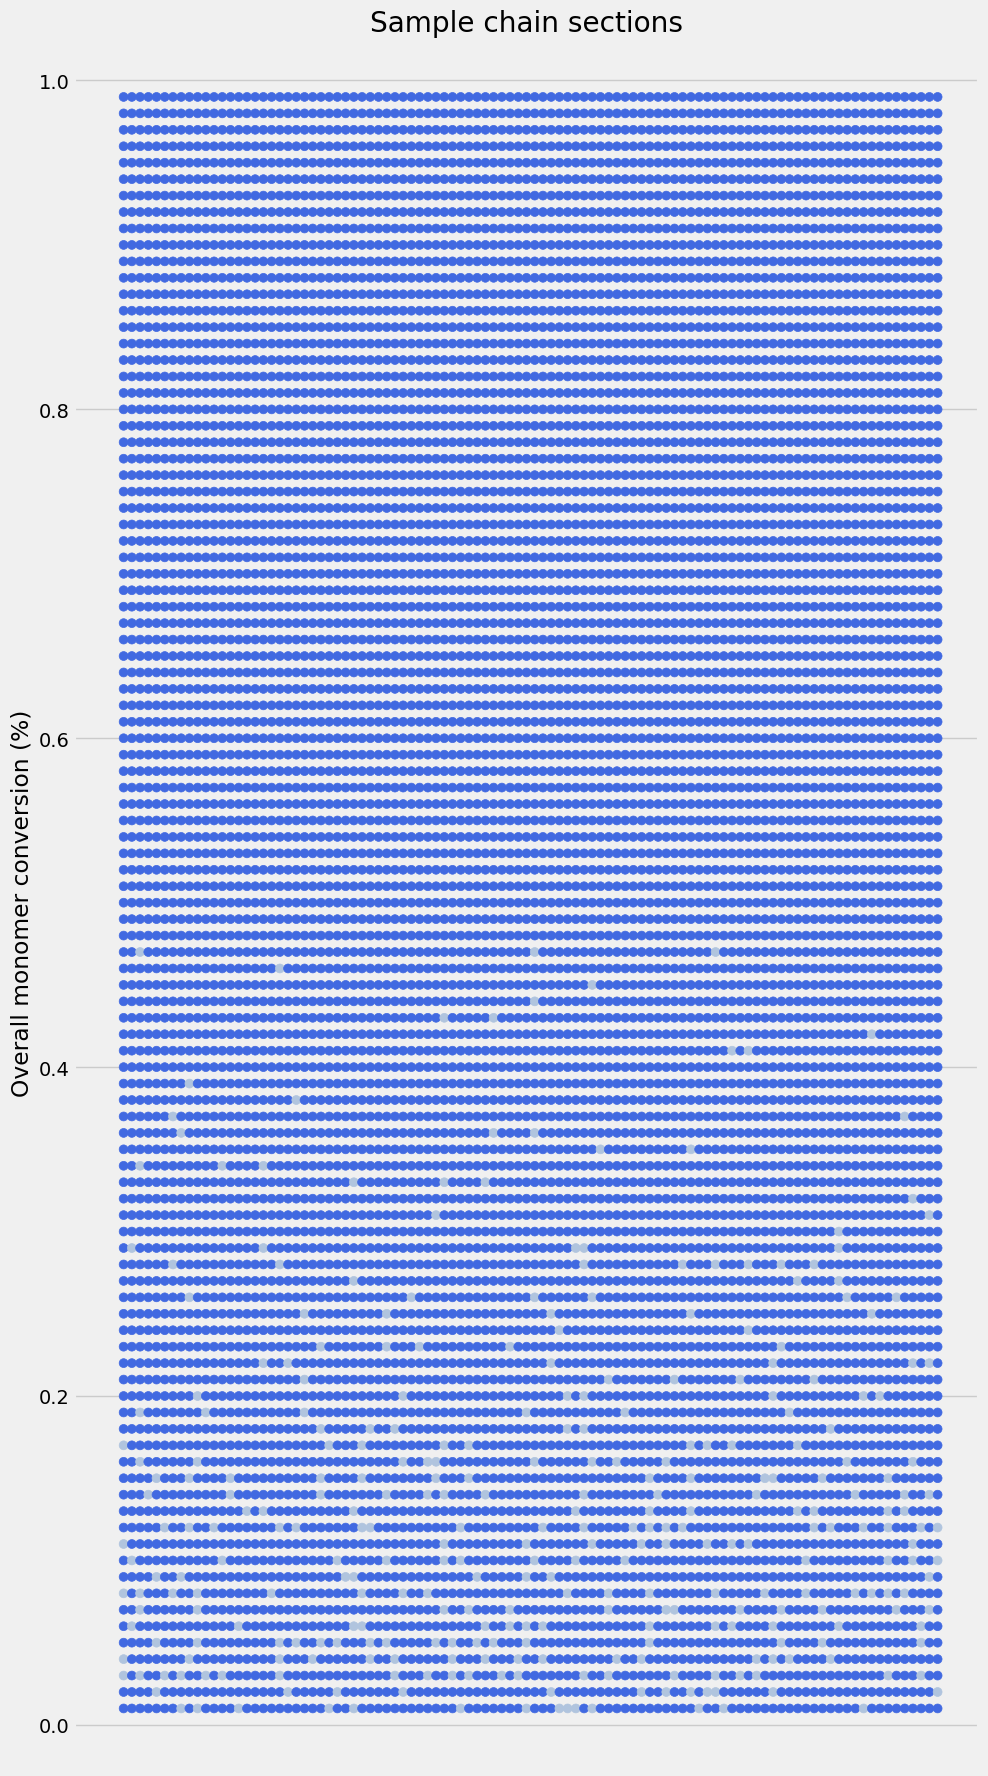

In [6]:
#@title Show sample chain sections and plot all changes vs overall monomer conversion. {display-mode: "form" }
plt.rcParams["figure.figsize"] = (10,20)
figure, axes = plt.subplots()
k=1
for chain_sec in chain_secs:
  j = 1
  for i in chain_sec:
    if i ==1:
      Drawing_colored_circle = plt.Circle(( j/200 , k/100 ), 0.0027, color = 'royalblue' )
    else:
      Drawing_colored_circle = plt.Circle(( j/200 , k/100 ), 0.0027, color = 'lightsteelblue' )
    axes.add_artist( Drawing_colored_circle )
    j+=1
  k+=1


axes.set_aspect( 1 )
axes.get_xaxis().set_visible(False)
plt.xlim( -0.025 , 0.525 )
plt.ylim( -0.025 , 1.025 )

plt.title( 'Sample chain sections' )
plt.ylabel('Overall monomer conversion (%)')
plt.tight_layout()
plt.show()



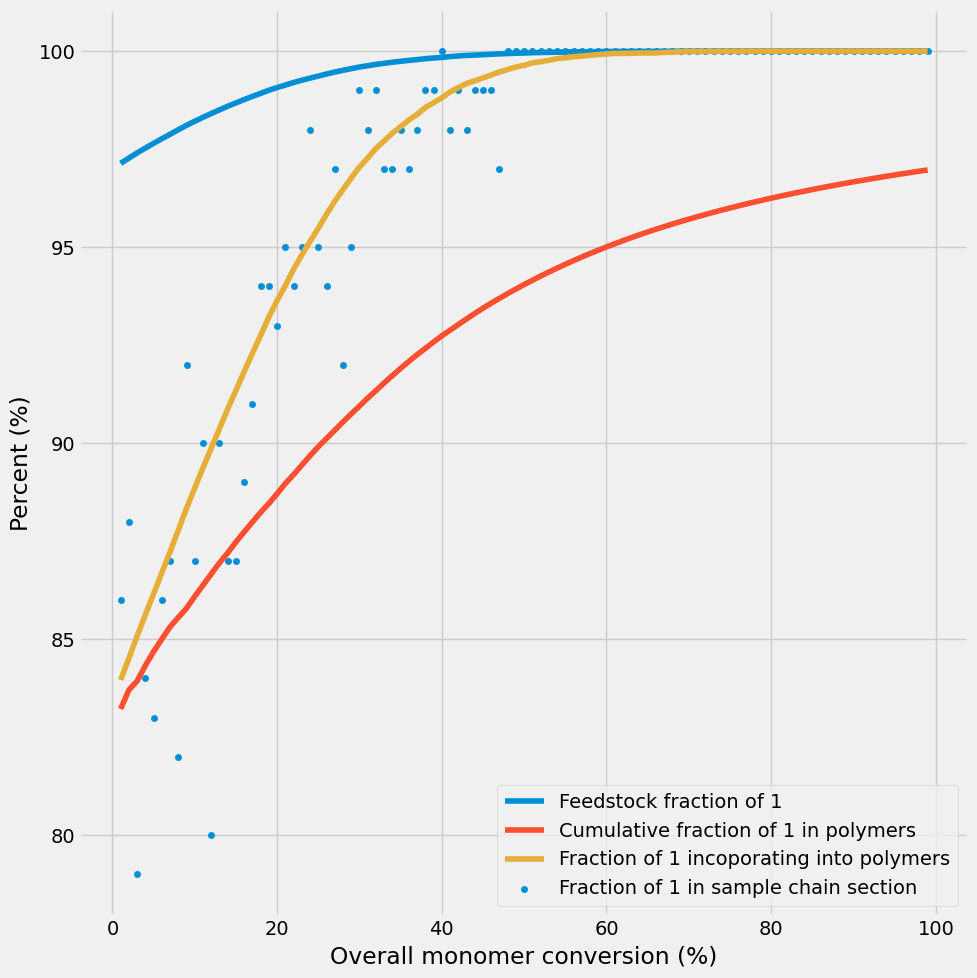

In [7]:
# @title {display-mode: "form" }
plt.rcParams["figure.figsize"] = (10,10)
ax1 = df_info.plot(x='Overall monomer conversion', y = ['Feedstock fraction of 1','Cumulative fraction of 1 in polymers','Fraction of 1 incoporating into polymers'])
_ = df_info.plot.scatter(x='Overall monomer conversion', y = ['Fraction of 1 in sample chain section'], marker = 'o', label = 'Fraction of 1 in sample chain section', ax = ax1)
plt.xlabel('Overall monomer conversion (%)')
plt.ylabel('Percent (%)')
plt.tight_layout()
plt.show()

---

In [8]:
#@title Copyright { display-mode: "form" }

from IPython.display import Markdown
import requests
copyright = requests.get("https://raw.githubusercontent.com/wangyu16/PolymerScienceEducation/master/copyright.md")
Markdown(copyright.text)

### MIT License  

Copyright (c) 2021 -- 2024 Yu Wang

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

### Contact

Dr. Yu Wang  
Department of Chemistry  
Institute for Materials Research and Innovation  
University of Louisiana at Lafayette  
Lafayette, LA 70504  
Email: yuwang@louisiana.edu

### Acknowledgement

This project is sponsored by National Science Foundation (NSF-2142043). 


In [9]:
# @title {display-mode: "form" }
links = requests.get("https://raw.githubusercontent.com/wangyu16/PolymerScienceEducation/refs/heads/master/links.md")
Markdown(links.text)

---

### Links

**[Home page of OVESET](https://wangyu16.github.io/PolymerScienceEducation/):** 

<img src="https://raw.githubusercontent.com/wangyu16/PolymerScienceEducation/refs/heads/master/img/QR_OVESET.svg" alt="OVESET Home Page" width="300">

**[Home page of Study Guide](https://hackmd.io/@YW2025/HJLiqoHRR)**

<img src="https://raw.githubusercontent.com/wangyu16/PolymerScienceEducation/refs/heads/master/img/QR_PolymerStudyGuide.svg" alt="Introduction to Polymer Science" width="300">

